In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import math
import scipy
from scipy import constants

In [3]:
print(scipy.__version__)

1.7.3


# Constants

In [4]:
print(dir(constants))

['Avogadro', 'Boltzmann', 'Btu', 'Btu_IT', 'Btu_th', 'ConstantWarning', 'G', 'Julian_year', 'N_A', 'Planck', 'R', 'Rydberg', 'Stefan_Boltzmann', 'Wien', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_obsolete_constants', 'acre', 'alpha', 'angstrom', 'arcmin', 'arcminute', 'arcsec', 'arcsecond', 'astronomical_unit', 'atm', 'atmosphere', 'atomic_mass', 'atto', 'au', 'bar', 'barrel', 'bbl', 'blob', 'c', 'calorie', 'calorie_IT', 'calorie_th', 'carat', 'centi', 'codata', 'constants', 'convert_temperature', 'day', 'deci', 'degree', 'degree_Fahrenheit', 'deka', 'dyn', 'dyne', 'e', 'eV', 'electron_mass', 'electron_volt', 'elementary_charge', 'epsilon_0', 'erg', 'exa', 'exbi', 'femto', 'fermi', 'find', 'fine_structure', 'fluid_ounce', 'fluid_ounce_US', 'fluid_ounce_imp', 'foot', 'g', 'gallon', 'gallon_US', 'gallon_imp', 'gas_constant', 'gibi', 'giga', 'golden', 'golden_ratio', 'grain', 'gram', 'gravitational_con

In [5]:
print(constants.mebi)
print(constants.electron_volt)
print(constants.gallon_US)
print(constants.gram)
print(constants.lb)
print(constants.degree)
print(constants.minute)
print(constants.mile)
print(constants.psi)
print(constants.hectare)
print(constants.mach)
print(constants.horsepower)

1048576
1.602176634e-19
0.0037854117839999997
0.001
0.45359236999999997
0.017453292519943295
60.0
1609.3439999999998
6894.757293168361
10000.0
340.5
745.6998715822701


# Optimizers

In [6]:
from scipy import optimize

In [7]:
print(dir(optimize))

['BFGS', 'Bounds', 'HessianUpdateStrategy', 'LbfgsInvHessProduct', 'LinearConstraint', 'NonlinearConstraint', 'OptimizeResult', 'OptimizeWarning', 'RootResults', 'SR1', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__nnls', '__package__', '__path__', '__spec__', '_basinhopping', '_bglu_dense', '_cobyla', '_constraints', '_differentiable_functions', '_differentialevolution', '_dual_annealing', '_group_columns', '_hessian_update_strategy', '_highs', '_lbfgsb', '_linprog', '_linprog_doc', '_linprog_highs', '_linprog_ip', '_linprog_rs', '_linprog_simplex', '_linprog_util', '_lsap', '_lsap_module', '_lsq', '_minimize', '_minpack', '_nnls', '_numdiff', '_qap', '_remove_redundancy', '_root', '_root_scalar', '_shgo', '_shgo_lib', '_slsqp', '_spectral', '_trlib', '_trustregion', '_trustregion_constr', '_trustregion_dogleg', '_trustregion_exact', '_trustregion_krylov', '_trustregion_ncg', '_zeros', 'anderson', 'approx_fprime', 'basinhopping', 'bisect'

In [8]:
def func(x):
    return x**3 + x*math.cos(x) +3

In [9]:
optimize.root(func,1)

    fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([-7.01541936e-10])
       r: array([-4.69424676])
  status: 1
 success: True
       x: array([-1.4038541])

In [10]:
optimize.minimize(func, 0, method='CG')# 'CG','BFGS','Newton-CG','L-BFGS-B','TNC','COBYLA','SLSQP'

     fun: array([-6.73910641e+153])
     jac: array([1.07034258e+103])
 message: 'Desired error not necessarily achieved due to precision loss.'
    nfev: 2798
     nit: 18
    njev: 1399
  status: 2
 success: False
       x: array([-1.88886436e+51])

# Sparse Data

In [11]:
from scipy import sparse

In [12]:
arr1 = np.array([3,0,1,0,0,1,0,0,0,0,21,0,0,0,5,0,0,0,0,0])

In [13]:
print(sparse.csr_matrix(arr1))

  (0, 0)	3
  (0, 2)	1
  (0, 5)	1
  (0, 10)	21
  (0, 14)	5


In [14]:
sparse.csr_matrix(arr1).data

array([ 3,  1,  1, 21,  5])

In [15]:
print(sparse.csr_matrix(arr1).count_nonzero())

5


In [16]:
arr2 = np.array([[0, 1,0], [1,0, 0], [2, 0, 0]])

In [17]:
print(sparse.csr_matrix(arr2).tocsc())

  (1, 0)	1
  (2, 0)	2
  (0, 1)	1


In [18]:
from scipy.sparse.csgraph import connected_components

In [19]:
arr = np.array([
  [0, 1, 2],
  [1, 0, 0],
  [2, 0, 0]
])

newarr = sparse.csr_matrix(arr)

print(connected_components(newarr))

(1, array([0, 0, 0], dtype=int32))


# Dijkstra

In [20]:
from scipy.sparse.csgraph import dijkstra

In [21]:
print(dijkstra(newarr, return_predecessors=True, indices=0))

(array([0., 1., 2.]), array([-9999,     0,     0], dtype=int32))


# Floyd Warshall

In [22]:
from scipy.sparse.csgraph import floyd_warshall

In [23]:
print(floyd_warshall(newarr, return_predecessors=True))

(array([[0., 1., 2.],
       [1., 0., 3.],
       [2., 3., 0.]]), array([[-9999,     0,     0],
       [    1, -9999,     0],
       [    2,     0, -9999]], dtype=int32))


# Bellman Ford

In [24]:
from scipy.sparse.csgraph import bellman_ford

In [25]:
print(bellman_ford(newarr, return_predecessors=True, indices=0))

(array([0., 1., 2.]), array([-9999,     0,     0], dtype=int32))


# Depth First Order

In [26]:
from scipy.sparse.csgraph import depth_first_order

In [27]:
print(depth_first_order(newarr, 1))

(array([1, 0, 2], dtype=int32), array([    1, -9999,     0], dtype=int32))


# Breadth First Order

In [28]:
from scipy.sparse.csgraph import breadth_first_order

In [29]:
print(breadth_first_order(newarr, 1))

(array([1, 0, 2], dtype=int32), array([    1, -9999,     0], dtype=int32))


# Triangulation

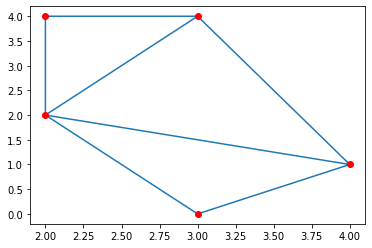

In [30]:
from scipy.spatial import Delaunay

points = np.array([
  [2, 4],
  [3, 4],
  [3, 0],
  [2, 2],
  [4, 1]
])

simplices = Delaunay(points).simplices

plt.triplot(points[:, 0], points[:, 1], simplices)
plt.scatter(points[:, 0], points[:, 1], color='r')

plt.show()

# Convex Hull

In [31]:
from scipy.spatial import ConvexHull

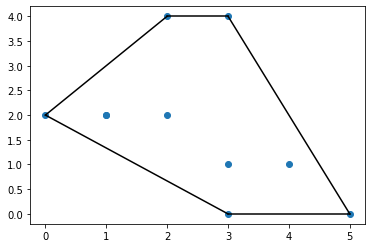

In [32]:
points = np.array([
  [2, 4],
  [3, 4],
  [3, 0],
  [2, 2],
  [4, 1],
  [1, 2],
  [5, 0],
  [3, 1],
  [1, 2],
  [0, 2]
])

hull = ConvexHull(points)
hull_points = hull.simplices

plt.scatter(points[:,0], points[:,1])
for simplex in hull_points:
  plt.plot(points[simplex,0], points[simplex,1], 'k-')

plt.show()

# KDTrees

In [33]:
from scipy.spatial import KDTree

points = [(1, -1), (2, 3), (-2, 3), (2, -3)]

kdtree = KDTree(points)

res = kdtree.query((1, 1))

print(res)

(2.0, 0)


# Euclidean Distance

In [34]:
from scipy.spatial.distance import euclidean

p1 = (1, 0)
p2 = (10, 2)

res = euclidean(p1, p2)

print(res)

9.219544457292887


# Manhattan Distance

In [35]:
from scipy.spatial.distance import cityblock

p1 = (1, 0)
p2 = (10, 2)

res = cityblock(p1, p2)

print(res)

11


# Cosine Distance

In [36]:
from scipy.spatial.distance import cosine

p1 = (1, 0)
p2 = (10, 2)

res = cosine(p1, p2)

print(res)

0.019419324309079777


# Hamming Distance

In [37]:
from scipy.spatial.distance import hamming

p1 = (True, False, True)
p2 = (False, True, True)

res = hamming(p1, p2)

print(res)

0.6666666666666666


# Matlab Arrays

In [38]:
from scipy import io

arr = np.arange(10)

io.savemat('arr.mat', {"vec": arr})

In [39]:
io.savemat('arr.mat', {"vec": arr})

# Import:
mydata = io.loadmat('arr.mat')

print(mydata)

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Thu Oct 13 05:41:54 2022', '__version__': '1.0', '__globals__': [], 'vec': array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])}


In [40]:
print(mydata['vec'])

[[0 1 2 3 4 5 6 7 8 9]]


In [41]:
mydata = io.loadmat('arr.mat', squeeze_me=True)

print(mydata['vec'])

[0 1 2 3 4 5 6 7 8 9]


# 1D Interpolation

In [42]:
from scipy.interpolate import interp1d

xs = np.arange(10)
ys = 2*xs + 1

interp_func = interp1d(xs, ys)

newarr = interp_func(np.arange(2.1, 3, 0.1))

print(newarr)

[5.2 5.4 5.6 5.8 6.  6.2 6.4 6.6 6.8]


# Spline Interpolation

In [43]:
from scipy.interpolate import UnivariateSpline
interp_func = UnivariateSpline(xs, ys)

newarr = interp_func(np.arange(2.1, 3, 0.1))

print(newarr)

[5.2 5.4 5.6 5.8 6.  6.2 6.4 6.6 6.8]


# Interpolation with Radial Basis Function

In [44]:
from scipy.interpolate import Rbf
interp_func = Rbf(xs, ys)

newarr = interp_func(np.arange(2.1, 3, 0.1))

print(newarr)

[5.19230156 5.38693145 5.58394432 5.78314562 5.98416725 6.18654187
 6.38976679 6.59335582 6.79688027]


# T-Test

In [45]:
from scipy.stats import ttest_ind

v1 = np.random.normal(size=100)
v2 = np.random.normal(size=100)

res = ttest_ind(v1, v2)

print(res)

Ttest_indResult(statistic=-1.6792943104180302, pvalue=0.09467198404649362)


# P value 

In [46]:
res = ttest_ind(v1, v2).pvalue

print(res)

0.09467198404649362


# KS-Test


In [47]:
from scipy.stats import kstest

v = np.random.normal(size=100)

res = kstest(v, 'norm')

print(res)

KstestResult(statistic=0.14806656274357866, pvalue=0.022312131694875673)


# Statistical Description of Data

In [48]:
from scipy.stats import describe

v = np.random.normal(size=100)
res = describe(v)

print(res)

DescribeResult(nobs=100, minmax=(-1.9187842464290172, 2.8896282456163376), mean=0.10273792704477802, variance=0.9148860173829587, skewness=0.4611182989752967, kurtosis=0.28504525838688943)


# Skewness and Kurtosis 

In [49]:
from scipy.stats import skew, kurtosis

v = np.random.normal(size=100)

print(skew(v))
print(kurtosis(v))

0.0906728722570156
-0.4602682268009457


# Normal test

In [50]:
from scipy.stats import normaltest

v = np.random.normal(size=100)

print(normaltest(v))

NormaltestResult(statistic=0.0676284295099806, pvalue=0.9667510960435153)
